In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv(r'C:\Users\Sagar Kandpal\Desktop\ML EXAMPLE\Modular\ML_Live_Class\data\mouse_viral_study.csv')
df.head()

,Med_1_mL,Med_2_mL,Virus Present
0,6.508231,8.582531,0
1,4.126116,3.073459,1
2,6.427870,6.369758,0
3,3.672953,4.905215,1
4,1.580321,2.440562,1


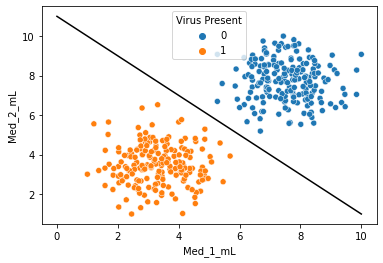

In [13]:
sns.scatterplot(x = 'Med_1_mL', y = 'Med_2_mL', data =df, hue = 'Virus Present')
# creating hyperplane manually

x = np.linspace(0,10,100)
m = -1
b = 11
y = m*x + b

plt.plot(x,y, 'black')

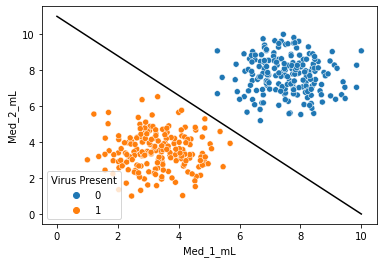

In [15]:
sns.scatterplot(x = 'Med_1_mL', y = 'Med_2_mL', data =df, hue = 'Virus Present')
# creating hyperplane manually

x = np.linspace(0,10,100)
m = -1.1
b = 11
y = m*x + b

plt.plot(x,y, 'black')

In [16]:
from sklearn.svm import SVC

In [17]:
help(SVC)

Help on class SVC in module sklearn.svm._classes:

class SVC(sklearn.svm._base.BaseSVC)
 |  SVC(*, C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovr', break_ties=False, random_state=None)
 |  
 |  C-Support Vector Classification.
 |  
 |  The implementation is based on libsvm. The fit time scales at least
 |  quadratically with the number of samples and may be impractical
 |  beyond tens of thousands of samples. For large datasets
 |  consider using :class:`~sklearn.svm.LinearSVC` or
 |  :class:`~sklearn.linear_model.SGDClassifier` instead, possibly after a
 |  :class:`~sklearn.kernel_approximation.Nystroem` transformer.
 |  
 |  The multiclass support is handled according to a one-vs-one scheme.
 |  
 |  For details on the precise mathematical formulation of the provided
 |  kernel functions and how `gamma`, `coef0` and `degree` affect each
 

In [18]:
X = df.drop('Virus Present', axis =1)

In [19]:
y = df['Virus Present']

In [34]:
model = SVC(kernel = 'poly', C = 1000)

In [35]:
model.fit(X,y)

SVC(C=1000, kernel='poly')

In [32]:
# CODE SOURCE IS DIRECTLY FROM DOCUMENTATION
# https://scikit-learn.org/stable/auto_examples/svm/plot_separating_hyperplane.html
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


def plot_svm_boundary(model,X,y):
    
    X = X.values
    y = y.values
    
    # Scatter Plot
    plt.scatter(X[:, 0], X[:, 1], c=y, s=30,cmap='seismic')

    
    # plot the decision function
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # create grid to evaluate model
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = model.decision_function(xy).reshape(XX.shape)

    # plot decision boundary and margins
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    # plot support vectors
    ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100,
               linewidth=1, facecolors='none', edgecolors='k')
    plt.show()

C:\Users\Sagar Kandpal\anaconda3\envs\mltest\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


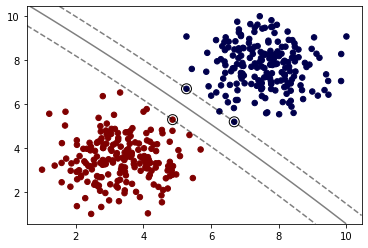

In [36]:
plot_svm_boundary(model, X, y)

In [37]:
# Exploring Hyperparameters in SVM

model = SVC(kernel = 'linear', C = 0.05)
model.fit(X,y)

SVC(C=0.05, kernel='linear')

C:\Users\Sagar Kandpal\anaconda3\envs\mltest\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


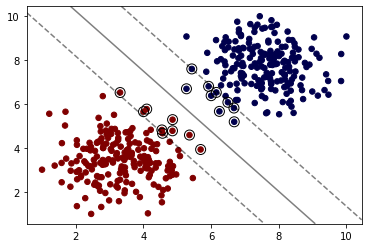

In [38]:
plot_svm_boundary(model, X,y)

C:\Users\Sagar Kandpal\anaconda3\envs\mltest\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


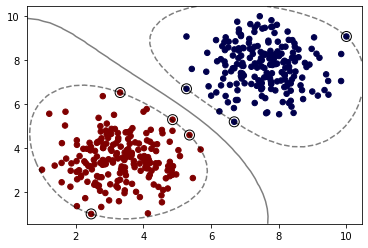

In [42]:
model = SVC(kernel = 'rbf', C =5)
model.fit(X,y)
plot_svm_boundary(model, X, y)


In [43]:
help(SVC)

Help on class SVC in module sklearn.svm._classes:

class SVC(sklearn.svm._base.BaseSVC)
 |  SVC(*, C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovr', break_ties=False, random_state=None)
 |  
 |  C-Support Vector Classification.
 |  
 |  The implementation is based on libsvm. The fit time scales at least
 |  quadratically with the number of samples and may be impractical
 |  beyond tens of thousands of samples. For large datasets
 |  consider using :class:`~sklearn.svm.LinearSVC` or
 |  :class:`~sklearn.linear_model.SGDClassifier` instead, possibly after a
 |  :class:`~sklearn.kernel_approximation.Nystroem` transformer.
 |  
 |  The multiclass support is handled according to a one-vs-one scheme.
 |  
 |  For details on the precise mathematical formulation of the provided
 |  kernel functions and how `gamma`, `coef0` and `degree` affect each
 

C:\Users\Sagar Kandpal\anaconda3\envs\mltest\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


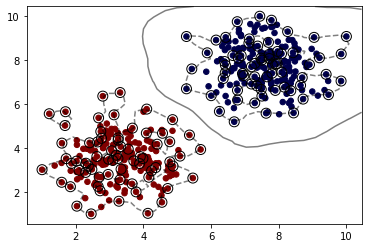

In [48]:
model = SVC(kernel = 'rbf', C =1, gamma = 2) # As gamma value is increasing it fits more support vectors near the margin
model.fit(X,y)
plot_svm_boundary(model, X, y)

C:\Users\Sagar Kandpal\anaconda3\envs\mltest\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


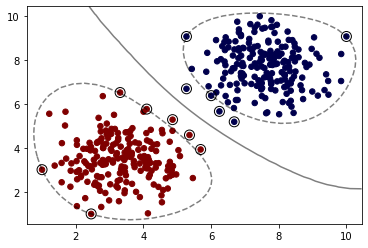

In [49]:
model = SVC(kernel = 'rbf', C =1, gamma = 'scale') 
model.fit(X,y)
plot_svm_boundary(model, X, y)

C:\Users\Sagar Kandpal\anaconda3\envs\mltest\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


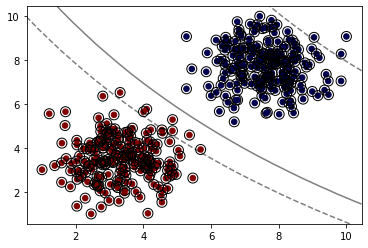

In [55]:
model = SVC(kernel = 'sigmoid') 
model.fit(X,y)
plot_svm_boundary(model, X, y)

C:\Users\Sagar Kandpal\anaconda3\envs\mltest\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


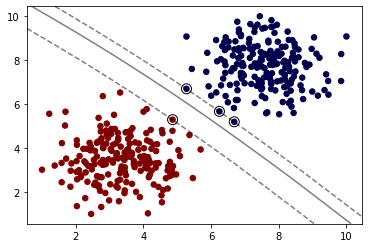

In [57]:
model = SVC(kernel = 'poly', C=1, degree = 9) 
model.fit(X,y)
plot_svm_boundary(model, X, y)

In [82]:
from sklearn.model_selection import GridSearchCV

svm_model = SVC()

param_grid = {'C': [0.01,0.1, 1], 'kernel': ['linear', 'rbf', 'sigmoid', 'poly']}

In [83]:
grid_model = GridSearchCV(svm_model, param_grid)

In [84]:
grid_model.fit(X,y)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1],
                         'kernel': ['linear', 'rbf', 'sigmoid', 'poly']})

In [85]:
grid_model.best_params_

{'C': 0.01, 'kernel': 'linear'}